In [1]:
import matplotlib
import importlib
import ventos.signal as signal
import ventos.sim.simple as simple
import pandas as pd, matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [10,7]

pd.set_option('precision', 4)



In [80]:
def vent_plots(pdf, title):
    fig, plots = plt.subplots(3, sharex=True) # , gridspec_kw={'hspace': 0}
    (ax1, ax2, ax3) = plots
    for ax in plots:
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['right'].set_visible(False)
    plots[-1].spines['bottom'].set_visible(True)
        
    fig.suptitle(title)
    ax1.plot(pdf['time'] / 1000, pdf['flow'], 'dimgray')
    ax1.plot(pdf['time'] / 1000, pdf['flow_i'], 'tab:orange')
    ax1.plot(pdf['time'] / 1000, pdf['flow_e'], 'tab:blue')

    ax1.set(ylabel = 'Flow (l/s)')
    ax2.plot(pdf['time'] / 1000, pdf['pressure_mouth'], 'dimgray')
    ax2.plot(pdf['time'] / 1000, pdf['pressure_1'], 'tab:green')
    ax2.plot(pdf['time'] / 1000, pdf['pressure_2'], 'tab:green')

    ax2.set(ylabel = 'P (cmH2O)')
    ax3.plot(pdf['time'] / 1000, pdf['lung_volume'], 'tab:orange')
    ax3.set(ylabel = 'Volume (ml)', xlabel = 'time (seconds)')
    ax1.label_outer()
    ax2.label_outer()
    plt.show()
    
def processed_plots(df):
    df.plot(x='time_s', y=['p', 'vhigh', 'vlow', 'PIP', 'PEEP', 'RR', 'phase'], # 'Vhigh', 'Vlow', # 'Thigh', 'Tlow', 'Tpeak',
            title = "Smoothing "
             rf"($\alpha_A$={config.alphaA} $\alpha_R$={config.alphaR}$\alpha_S$={config.alphaS}"
             f" Hz={config.sample_frequency} noise RMS={scenario['pressure_noise_sd']})"
                      )
    plt.show()

In [66]:
def run_and_output(scenario):
    print(scenario)
    pdf = simple.execute_scenario(scenario)
    vent_plots(pdf, title=scenario['title'])
    return pdf


In [67]:
base_scenario = dict(
    title = 'Base',
    resistance = 20,
    PEEP = 5,
    IE = 0.5,
    Pi = 15,
    rate = 10,
    end_time = 30,
    time_resolution = 50,
    flow_noise_sd = 0.05,
    pressure_noise_sd = 1,
    heart_rate = 85,
    cardiac_amplitude = 0.05,
    events = []
)
e= 30
r= 500
c= 0.1
badness = [
    dict(attr = 'PEEP', val = 10, time=4),
    dict(attr = 'Pi', val = 15, time=6),
    dict(attr = 'Pi', val = 13, time=10),

]

{'title': 'Badness', 'resistance': 20, 'PEEP': 5, 'IE': 0.5, 'Pi': 15, 'rate': 10, 'end_time': 30, 'time_resolution': 500, 'flow_noise_sd': 0.05, 'pressure_noise_sd': 1, 'heart_rate': 60, 'cardiac_amplitude': 0.1, 'events': [{'attr': 'PEEP', 'val': 10, 'time': 4}, {'attr': 'Pi', 'val': 15, 'time': 6}, {'attr': 'Pi', 'val': 13, 'time': 10}]}
Event at 4000ms setting PEEP to 10
Event at 6000ms setting Pi to 15
Event at 10000ms setting Pi to 13


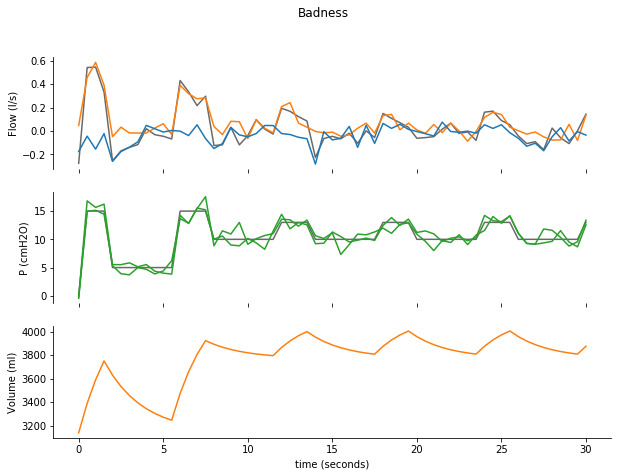

In [68]:
scenarios = [
    dict(base_scenario, title='Badness', 
         cardiac_amplitude = c, end_time = e, heart_rate = 60, time_resolution = r,
         events=badness),
]
held_senarios = [
    base_scenario,
    dict(base_scenario, title='Cardiac 30', cardiac_amplitude = c, end_time = e, heart_rate = 30, time_resolution = r),
    dict(base_scenario, title='Cardiac 120', cardiac_amplitude = c, end_time = e, heart_rate = 120, time_resolution = r),
    dict(base_scenario, title='High Resistance', resistance = 80),
    dict(base_scenario, title='Low Pressure', Pi = 7),
    dict(base_scenario, title='Wimpy', PEEP = 7, Pi=10),
    dict(base_scenario, title='High Pressure', PEEP = 14),
    dict(base_scenario, title='Stuck High', PEEP = 14, Pi = 14),
    dict(base_scenario, title='Crazy fast', rate = 60),   
    dict(base_scenario, title='Too slow', rate = 3),   
    dict(base_scenario, title='No expiration time', rate = 12, IE = 5),   
]
for s in scenarios:
    run_and_output(s)

{'title': 'Base', 'resistance': 20, 'PEEP': 5, 'IE': 0.5, 'Pi': 15, 'rate': 10, 'end_time': 30, 'time_resolution': 50, 'flow_noise_sd': 0.05, 'pressure_noise_sd': 1, 'heart_rate': 85, 'cardiac_amplitude': 0.05, 'events': []}


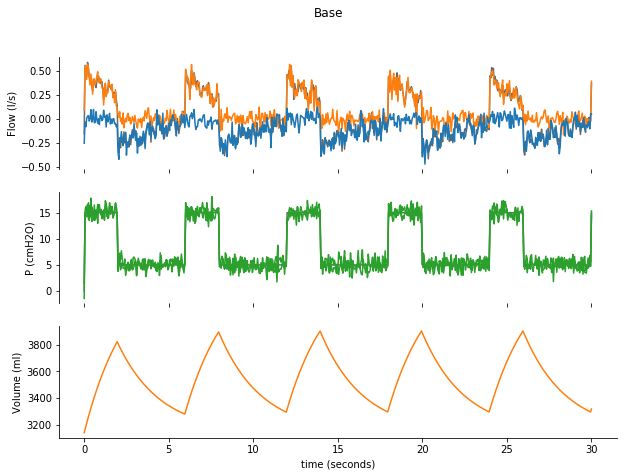

[{"event":"M","type":"P","loc":"I","ms":0,"val":-1},{"event":"M","type":"P","loc":"E","ms":0,"val":1},{"event":"M","type":"F","loc":"I","ms":0,"val":5381},{"event":"M","type":"F","loc":"E","ms":0,"val":-15195},{"event":"M","type":"P","loc":"I","ms":50,"val":15},{"event":"M","type":"P","loc":"E","ms":50,"val":15},{"event":"M","type":"F","loc":"I","ms":50,"val":32327},{"event":"M","type":"F","loc":"E","ms":50,"val":-2009},{"event":"M","type":"P","loc":"I","ms":100,"val":16},{"event":"M","type":"P","loc":"E","ms":100,"val":14},{"event":"M","type":"F","loc":"I","ms":100,"val":32527},{"event":"M","type":"F","loc":"E","ms":100,"val":-4874},{"event":"M","type":"P","loc":"I","ms":150,"val":15},{"event":"M","type":"P","loc":"E","ms":150,"val":16},{"event":"M","type":"F","loc":"I","ms":150,"val":24482},{"event":"M","type":"F","loc":"E","ms":150,"val":251},{"event":"M","type":"P","loc":"I","ms":200,"val":14},{"event":"M","type":"P","loc":"E","ms":200,"val":17},{"event":"M","type":"F","loc":"I","m

In [69]:
pdf = run_and_output(base_scenario)        
print(simple.df_to_PIRDS(pdf.head()).to_json(orient="records"))

{'title': 'Base', 'resistance': 20, 'PEEP': 5, 'IE': 0.5, 'Pi': 15, 'rate': 10, 'end_time': 30, 'time_resolution': 50, 'flow_noise_sd': 0.05, 'pressure_noise_sd': 1, 'heart_rate': 85, 'cardiac_amplitude': 0.05, 'events': []}


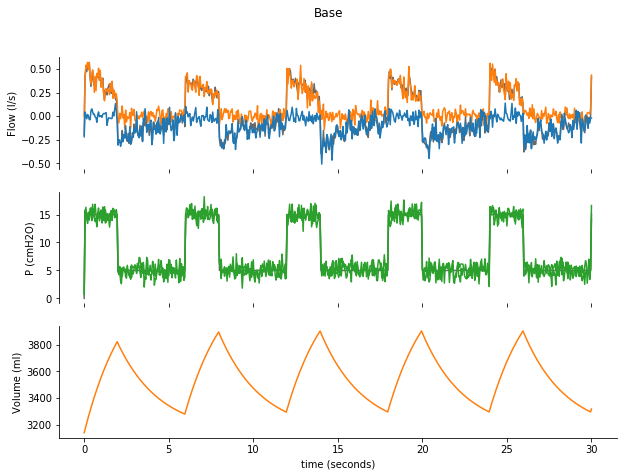

In [70]:
pdf = run_and_output(base_scenario)

In [71]:
f = pdf.head(5).to_json(orient='records')

In [72]:
vs = signal.VentilatorStatus()
config = signal.VentilatorConfig()

{'title': 'Base', 'resistance': 20, 'PEEP': 5, 'IE': 0.5, 'Pi': 20, 'rate': 10, 'end_time': 20, 'time_resolution': 10, 'flow_noise_sd': 0.05, 'pressure_noise_sd': 1, 'heart_rate': 85, 'cardiac_amplitude': 0.05, 'events': [{'attr': 'PEEP', 'val': 10, 'time': 40}, {'attr': 'Pi', 'val': 15, 'time': 46}, {'attr': 'Pi', 'val': 13, 'time': 50}, {'attr': 'PEEP', 'val': 13, 'time': 55}, {'attr': 'PEEP', 'val': 5, 'time': 120}, {'attr': 'Pi', 'val': 20, 'time': 121}]}
WARNING 6 unprocessed


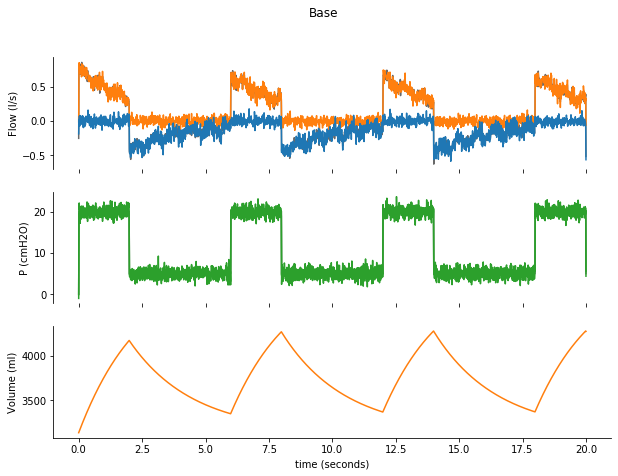

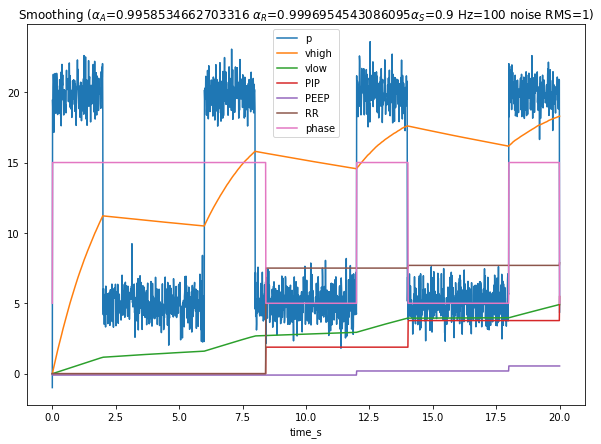

In [79]:
sample_frequency = 100
start = 40
fix = 120
badness = [
    dict(attr = 'PEEP', val = 10, time=start),
    dict(attr = 'Pi', val = 15, time=start+6),
    dict(attr = 'Pi', val = 13, time=start+10),
    dict(attr = 'PEEP', val = 13, time=start+15),
    dict(attr = 'PEEP', val = 5, time=fix),
    dict(attr = 'Pi', val = 20, time=fix+1),
]
scenario = dict(base_scenario,
                Pi=20, PEEP=5,
                time_resolution = round(1000/sample_frequency), end_time = 20,
                events = badness)
sim = run_and_output(scenario)

importlib.reload(signal)
config.sample_frequency = sample_frequency 

config.alphaA = signal.retune_alpha(0.66, sample_frequency)
config.alphaR = signal.retune_alpha(0.97, sample_frequency) # was 0.997 @ 10 hz
results = signal.process_trace(sim, config, pressure_column='pressure_1')

plot_processed(results)
plt.show()

In [58]:
scenario

{'title': 'Base',
 'resistance': 20,
 'PEEP': 5,
 'IE': 0.5,
 'Pi': 20,
 'rate': 10,
 'end_time': 240,
 'time_resolution': 100,
 'flow_noise_sd': 0.05,
 'pressure_noise_sd': 1,
 'heart_rate': 85,
 'cardiac_amplitude': 0.05,
 'events': []}

In [76]:
importlib.reload(signal)

for a in [0.8, 0.9, 0.95, 0.96, 0.97, 0.997]:
    for t in [10, 100]:
        print(f"retuning {a} from {t}Hz to 1Hz is {signal.retune_alpha(alpha=a, starting_frequency=t, new_frequency=1)}")
xscenarios = [
    [0.2,1],
    [0.9,10],
    [0.96,10],
    [0.9,10],
    [0.9, 100],
    [0.9895192582062144, 100],
    [signal.retune_alpha(alpha = 0.9, starting_frequency=10, new_frequency=1), 1],
]
for s in xscenarios:
    print(f'{s[0]}**{s[1]} ={s[0]**s[1]}')

retuning 0.8 from 10Hz to 1Hz is 0.10737418240000006
retuning 0.8 from 100Hz to 1Hz is 2.037035976334492e-10
retuning 0.9 from 10Hz to 1Hz is 0.3486784401
retuning 0.9 from 100Hz to 1Hz is 2.6561398887587493e-05
retuning 0.95 from 10Hz to 1Hz is 0.5987369392383786
retuning 0.95 from 100Hz to 1Hz is 0.005920529220333997
retuning 0.96 from 10Hz to 1Hz is 0.6648326359915008
retuning 0.96 from 100Hz to 1Hz is 0.016870319358849594
retuning 0.97 from 10Hz to 1Hz is 0.7374241268949281
retuning 0.97 from 100Hz to 1Hz is 0.047552507925405635
retuning 0.997 from 10Hz to 1Hz is 0.9704017769489168
retuning 0.997 from 100Hz to 1Hz is 0.7404842595397826
0.2**1 =0.2
0.9**10 =0.3486784401000001
0.96**10 =0.6648326359915008
0.9**10 =0.3486784401000001
0.9**100 =2.6561398887587544e-05
0.9895192582062144**100 =0.34867844010000193
0.3486784401**1 =0.3486784401
